<table style="width:100%">
  <tr>
    <td><img src="https://unioviedo-my.sharepoint.com/:i:/g/personal/sgcortes_uniovi_es/Ebr0ybKDTBNKtoJyzmTBuRYBXY7nE-cCYaH-WDIVJxEVWA?&download=1" width="211" height="69" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></td>
    <td><font color=brown>ML&DL Naples 2023<br></font>
    <font color=green>Universidad de Oviedo. <br>Ingeniería en Geomática</font> <br><br>sgcortes@uniovi.es</td>
  </tr>
</table>

## **Clustering: K-means.**
### An example with OpenCV over an image. 

We will use the following OpenCV function:

**cv2.kmeans(data, K, criteria, attempts, flags[, bestLabels[, centers]]) → retval, bestLabels, centers**

**_Output_**

* compactness: Sum of the square distances from each data to the cluster center it belong to.

* bestlabels: Label matrix. Each pixel will be given a label between 0 and K-1 (where K is the number of clusters)

* centers: [c x n] centers of the clusters   

**_Input_**

* data: Data type msut be np.float32, and each feature must also be only in one column.
* nclusters(K) : Number of required clusters from Kmeans algorithm
* criteria: Iteration finishing criteria. When this criteria is fullfilled process stops. It can be a tuple of values: ("type", "max_iter", "epsilon"):

    -   3.a - Stopping criteria. 3 possibilities:
cv2.TERM_CRITERIA_EPS - iteration is stopped if the cahnge in sum of squres fucntion is under epsilon.
cv2.TERM_CRITERIA_MAX_ITER - maximum number of iterations
cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER - 
if any of these is fullfilled it will stop.
    -  3.b - max_iter - an integer number with the maximum number of iterations
    -  3.c - epsilon - Required accuracy

- attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.
- flags : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

[K-Means Clustering in OpenCV](https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html)

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Min and max values for labels and label array dimensions: [0] [4] (680900, 1)


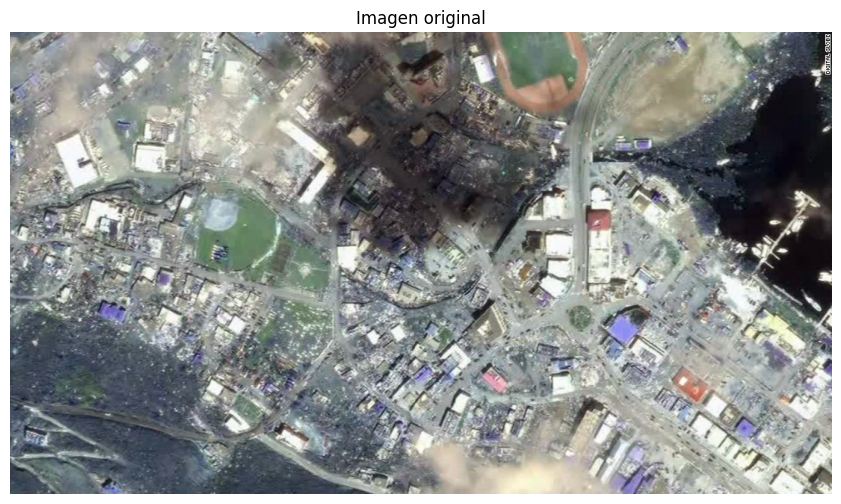

In [7]:
# Reading the image in memory
img=cv2.imread('irma_devastation.jpg',1)
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.axis('off')
plt.title("Imagen original")

# Image data conversion and image matrix reshaping for kmeans
# Reshaping must be: one channel (R,G,B) per column   
 
imgCL=np.float32(img.reshape((-1,3)))#

# Definición de error máximo (en pixels) y máximo numero de iteraciones
criterios=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,15,1.0)

# Número de clases a establecer
K=5

# Algoritmo K-means
ret,lab,center = cv2.kmeans(imgCL, K, None, criterios, 10, cv2.KMEANS_RANDOM_CENTERS)
#Sintax: cv2.kmeans(data, K, criteria, attempts, flags[, bestLabels[, centers]]) → retval, bestLabels, centers

# No suministramos niguna muestra al algoritmo (None)
# We asked for a 10 times repetition and we keep best result (compactness)
print('Min and max values for labels and label array dimensions:',min(lab),max(lab),lab.shape)

**Let´s see the result labeled image:**

Compactness: 484993559.8592137
Centros de las clases:
 [[ 36  35  40]
 [223 225 217]
 [ 79  84  88]
 [128 133 129]
 [171 174 168]]
label matrix dimensions: (680900, 1)
First elements of the label matrix (flattened):
 [3 2 2 2 2]
final image dims: (619, 1100, 3)


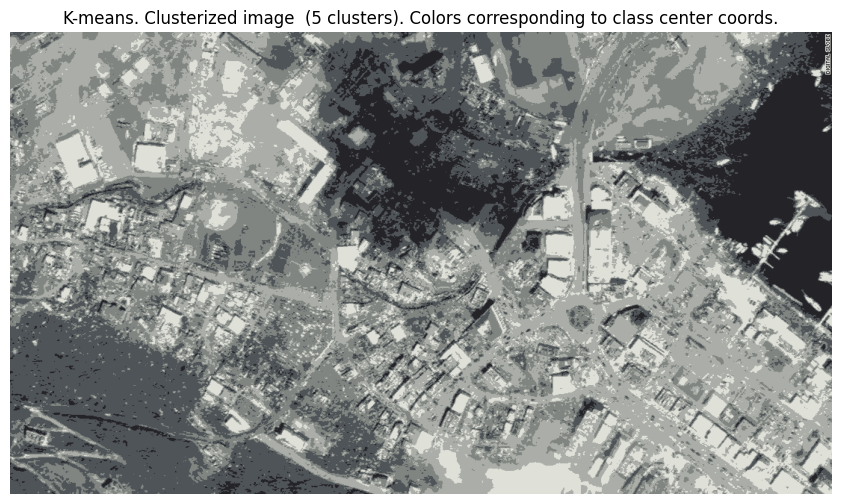

In [15]:
print('Compactness:',ret)
center=np.uint8(center)
print('Centros de las clases:\n',center)

print('label matrix dimensions:', lab.shape)

# we use flatten to cvonvert the uniddimensional matrix in a vector.
print('First elements of the label matrix (flattened):\n',lab.flatten()[0:5])

# creamos una imagen con los valores de los centros para cada valor de la etiqueta
res=center[lab.flatten()]; # cada etiqueta de res es sustituida por los centros de la clase con esa etiqueta

#print('imagen con colores de los centros:',res)
res2=res.reshape((img.shape));# devolvemos la imagen a sus dimensiones originales
print('final image dims:',res2.shape)

plt.figure(figsize=(12,6))
plt.imshow(res2)
plt.axis('off')
plt.title("K-means. Clusterized image  (5 clusters). Colors corresponding to class center coords.");

Podemos aumentar el contraste de la imagen empleando colores falsos en los centros de las clases, por ejemplo:
Rojo, Verde, Azul y Magenta:

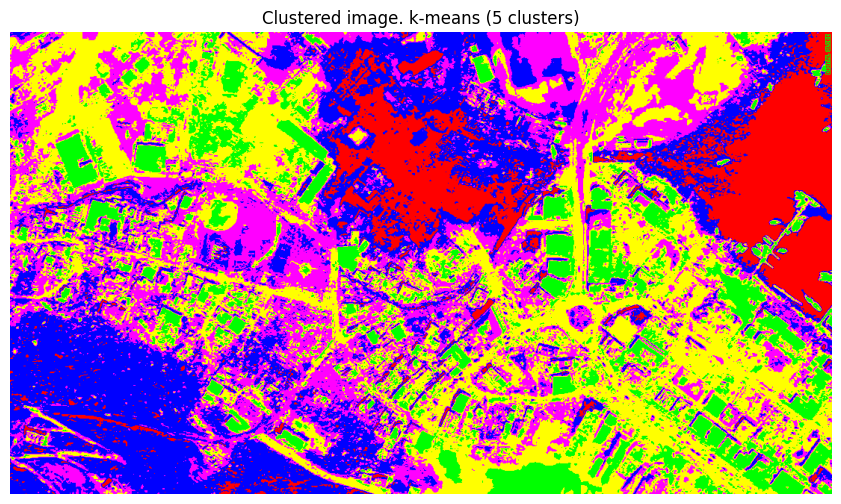

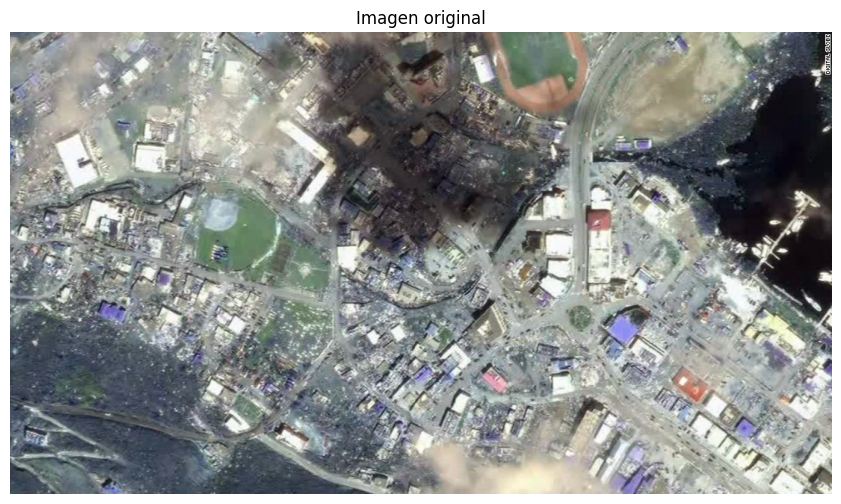

In [17]:
colores=np.array([[255, 0, 0],[0, 255, 0],[0, 0, 255],[255, 0, 255],[255,255,0]])
res3=colores[lab.flatten()] 
res3=res3.reshape((img.shape))
plt.figure(figsize=(12,6))
plt.imshow(res3)
plt.title("Clustered image. k-means (5 clusters)")
plt.axis('off')
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.title("Imagen original")
plt.axis('off');

### **References**

* [Kmeans OpenCV tutorial](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)

* Arthur and Vassilvitskii [Arthur2007].k-means++: the advantages of careful seeding, Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, 2007

